<a href="https://colab.research.google.com/github/kazzastic/BreastCancer-Deep-Learning/blob/master/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import threading 
from PIL import Image
import glob
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
import cv2
from matplotlib import pyplot
from numpy import expand_dims

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
image_list = []
i = 0
for filename in glob.glob('/content/drive/My Drive/REAL/NIC/*.jpg'): #assuming jpg
    im=Image.open(filename)
    image_list.append(im)
    print(i)
    i +=1
len(image_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

314

DONE 0
DONE 50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-8-dee214c616cd>", line 43, in FiftyTo100
    pyplot.subplot(330 + 1 + i)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py", line 1076, in subplot
    a = fig.add_subplot(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py", line 1416, in add_subplot
    return self._add_axe

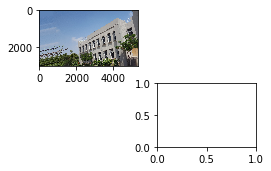

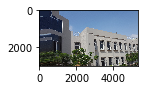

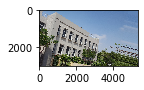

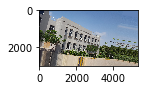

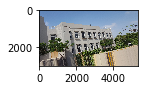

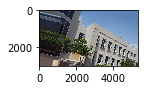

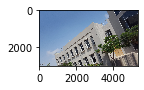

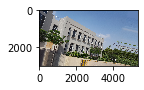

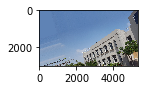

DONE 56


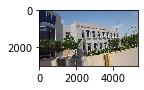

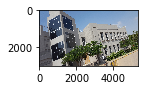

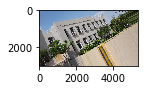

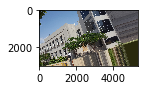

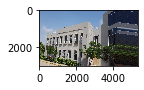

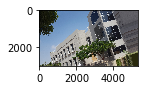

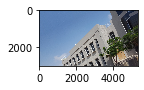

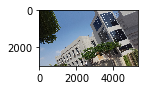

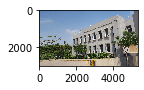

DONE 1


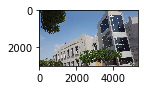

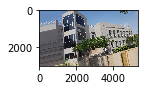

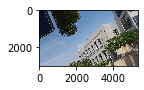

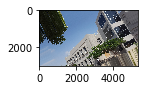

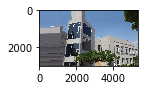

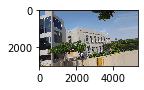

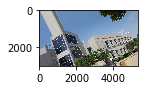

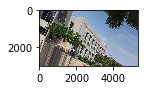

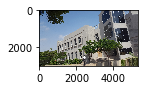

DONE 57


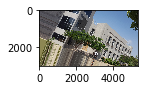

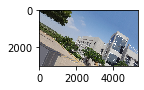

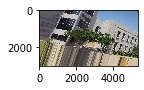

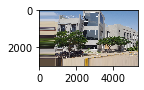

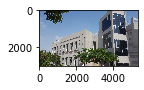

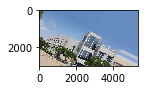

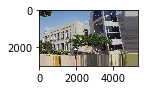

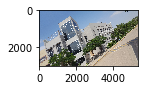

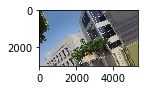

DONE 2


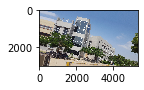

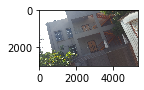

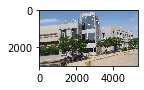

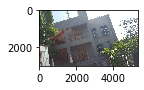

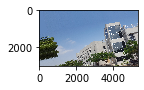

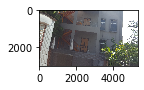

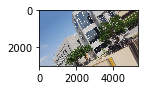

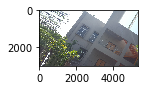

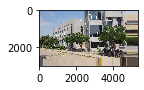

DONE 58


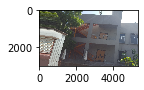

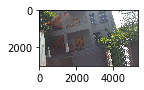

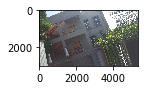

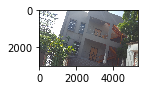

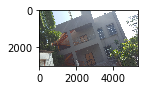

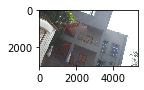

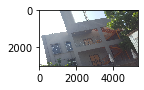

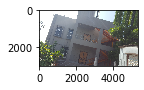

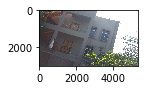

DONE 3


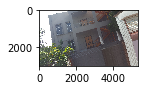

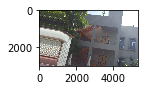

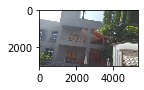

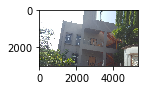

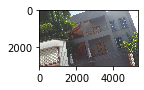

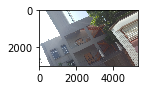

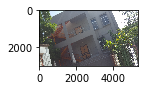

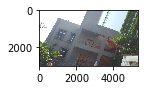

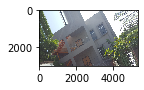

DONE 59


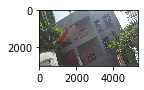

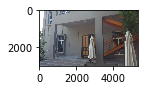

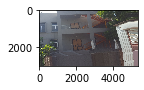

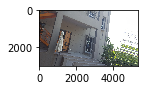

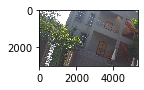

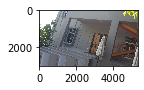

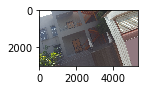

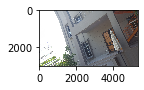

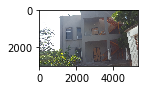

DONE 4


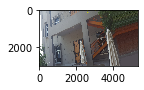

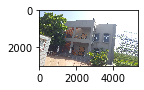

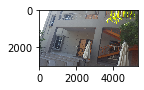

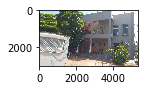

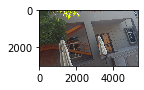

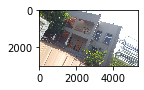

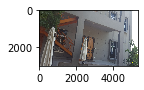

KeyboardInterrupt: ignored

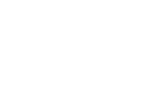

In [8]:
def ZeroTo50():
  m = 0
  for i in range(0,50):
  # convert to numpy array
    data = img_to_array(image_list[i])
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(rotation_range=30,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")
    # prepare iterator
    it = datagen.flow(samples, batch_size=1, save_to_dir='/content/drive/My Drive/multithreading', save_format = 'png')
    print("DONE", m)
    m += 1
    # generate samples and plot
    for i in range(9):
    # define subplot
        pyplot.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        pyplot.imshow(image)
        # show the figure
        pyplot.show()

def FiftyTo100():
  m = 50
  for i in range(50,100):
  # convert to numpy array
    data = img_to_array(image_list[i])
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(rotation_range=30,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")
    # prepare iterator
    it = datagen.flow(samples, batch_size=1, save_to_dir='/content/drive/My Drive/multithreading', save_format = 'png')
    print("DONE", m)
    m += 1
    # generate samples and plot
    for i in range(9):
    # define subplot
        pyplot.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        pyplot.imshow(image)
        # show the figure
        pyplot.show()

if __name__ == "__main__":
  t1 = threading.Thread(target = ZeroTo50)
  t2 = threading.Thread(target = FiftyTo100)

  t1.start()
  t2.start()

  t1.join()
  t2.join()

  print("FINAL DONE")